Optimal k: 5 with cross-validated accuracy: 0.72

Overall Accuracy: 0.699228791773779

Sensitivity and Specificity per Class:
Class          Sensitivity    Specificity    
Pastry         0.28           0.96           
Z_Scratch      0.93           0.97           
K_Scratch      0.92           0.98           
Stains         0.92           0.99           
Dirtiness      0.75           0.98           
Bumps          0.67           0.88           
Other_Faults   0.59           0.86           


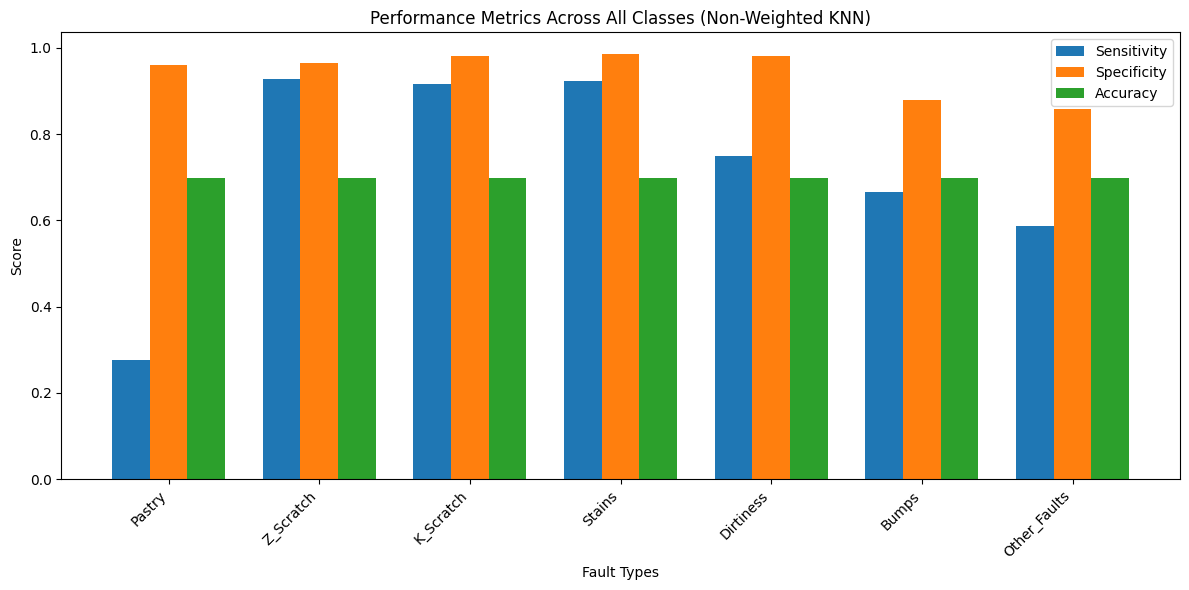

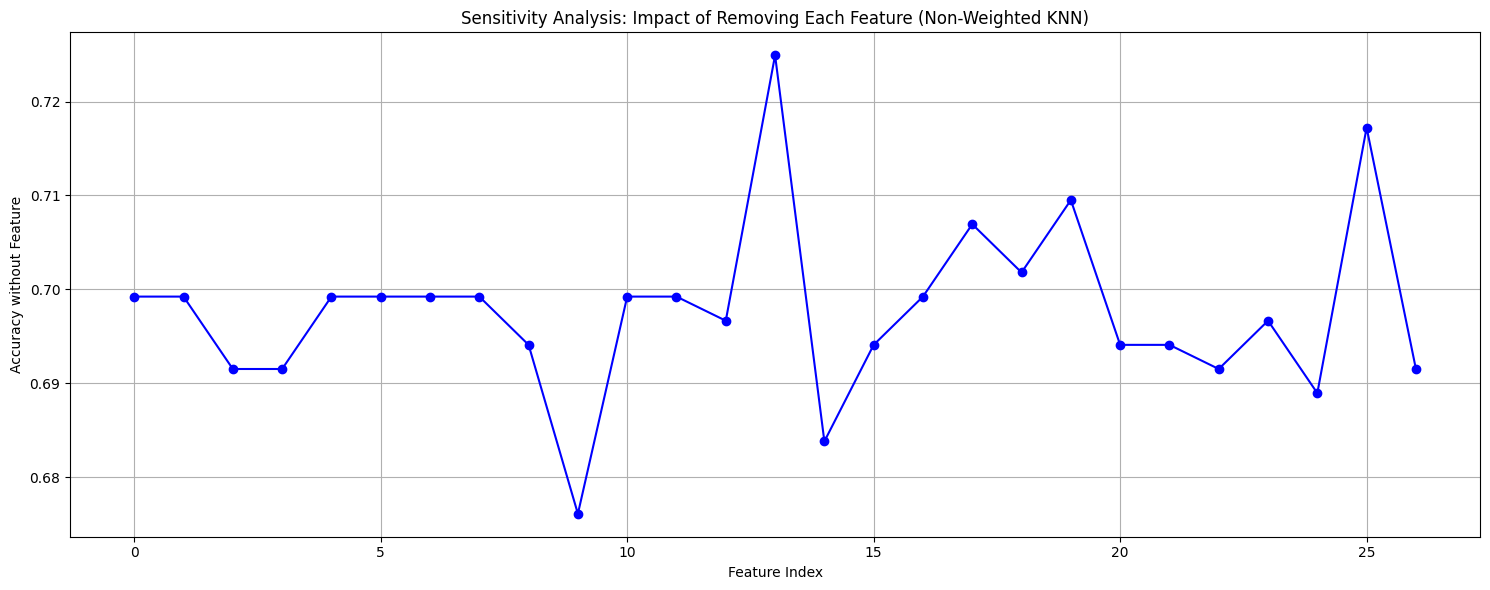

<Figure size 1200x600 with 0 Axes>

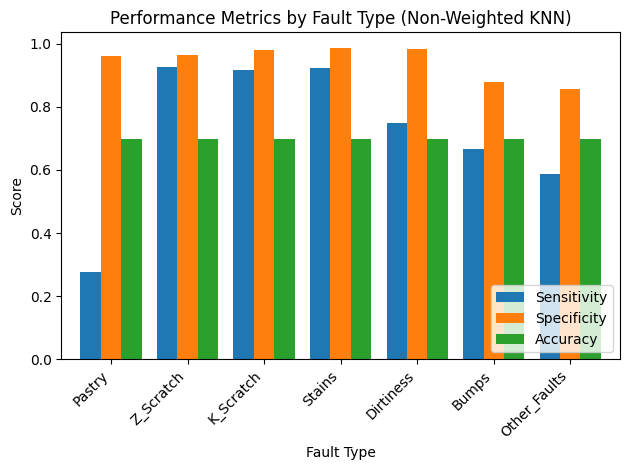

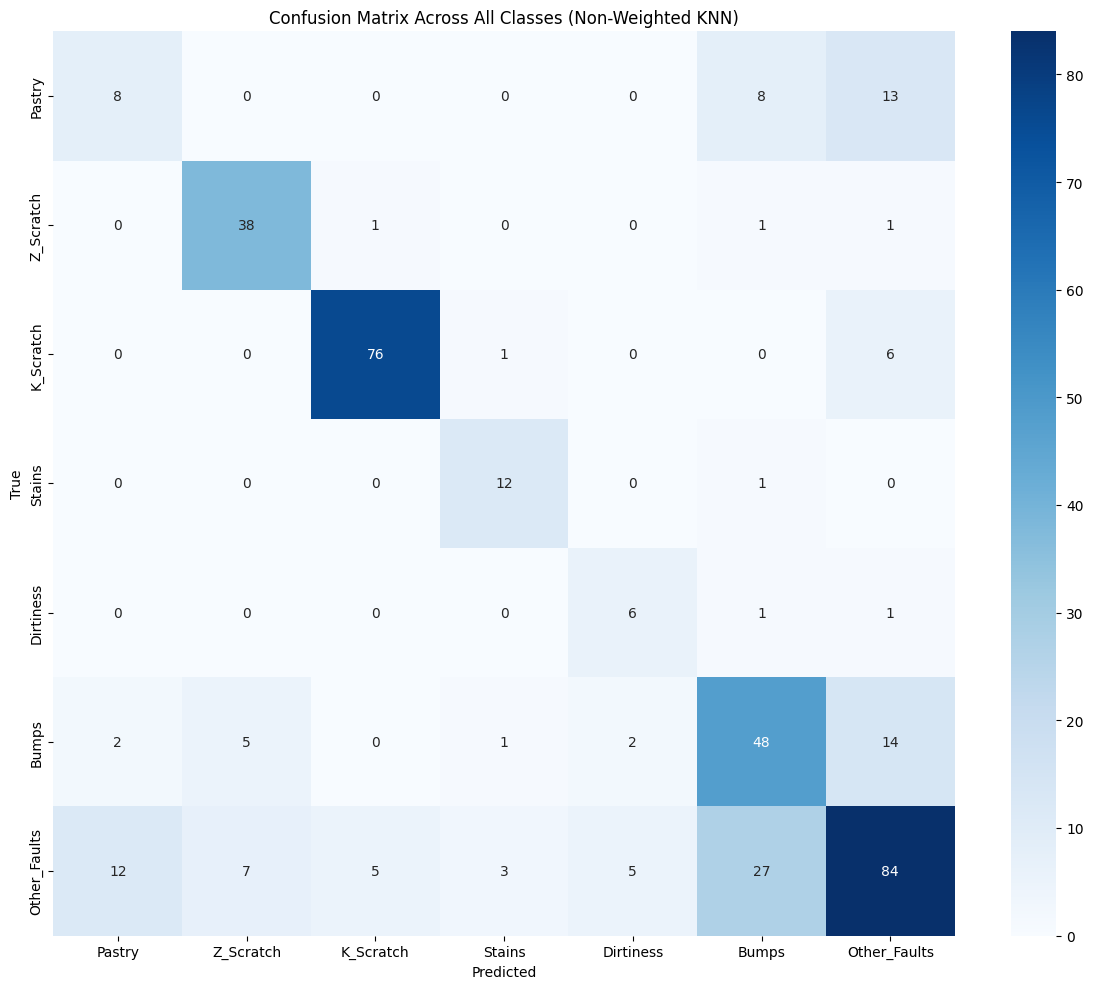

In [22]:
#non weighted KNN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'normalized_data.csv'
data = pd.read_csv(file_path)

# Identify class columns and feature columns
class_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
X = data.drop(columns=class_columns).values
y = data[class_columns].idxmax(axis=1).values

def plot_overall_metrics(sensitivity_dict, specificity_dict, accuracy):
    """Plot overall metrics across all classes."""
    plt.figure(figsize=(12, 6))
    
    # Prepare data
    classes = list(sensitivity_dict.keys())
    sensitivities = [sensitivity_dict[c] for c in classes]
    specificities = [specificity_dict[c] for c in classes]
    accuracies = [accuracy] * len(classes)
    
    # Create grouped bar chart
    x = np.arange(len(classes))
    width = 0.25
    
    plt.bar(x - width, sensitivities, width, label='Sensitivity')
    plt.bar(x, specificities, width, label='Specificity')
    plt.bar(x + width, accuracies, width, label='Accuracy')
    
    plt.xlabel('Fault Types')
    plt.ylabel('Score')
    plt.title('Performance Metrics Across All Classes (Non-Weighted KNN)')
    plt.xticks(x, classes, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_sensitivity_analysis(sensitivity_results):
    """Plot sensitivity analysis results."""
    plt.figure(figsize=(15, 6))
    
    feature_indices = [r['Feature Index'] for r in sensitivity_results]
    accuracies = [r['Accuracy'] for r in sensitivity_results]
    
    plt.plot(feature_indices, accuracies, 'bo-')
    plt.xlabel('Feature Index')
    plt.ylabel('Accuracy without Feature')
    plt.title('Sensitivity Analysis: Impact of Removing Each Feature (Non-Weighted KNN)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_fault_performance(sensitivity_dict, specificity_dict, accuracy):
    """Plot performance metrics per fault type."""
    metrics_df = pd.DataFrame({
        'Fault Type': list(sensitivity_dict.keys()),
        'Sensitivity': list(sensitivity_dict.values()),
        'Specificity': list(specificity_dict.values()),
        'Accuracy': [accuracy] * len(sensitivity_dict)
    })
    
    plt.figure(figsize=(12, 6))
    metrics_df.set_index('Fault Type').plot(kind='bar', width=0.8)
    plt.title('Performance Metrics by Fault Type (Non-Weighted KNN)')
    plt.xlabel('Fault Type')
    plt.ylabel('Score')
    plt.legend(loc='lower right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(conf_matrix, class_labels):
    """Plot comprehensive confusion matrix."""
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title('Confusion Matrix Across All Classes (Non-Weighted KNN)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find optimal k
optimal_k = 1
highest_accuracy = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    
    if mean_accuracy > highest_accuracy:
        highest_accuracy = mean_accuracy
        optimal_k = k

print(f"Optimal k: {optimal_k} with cross-validated accuracy: {highest_accuracy:.2f}")

# Train model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_columns)
accuracy = accuracy_score(y_test, y_pred)

# Calculate sensitivity and specificity
sensitivity = {}
specificity = {}
for i, class_label in enumerate(class_columns):
    TP = conf_matrix[i, i]
    FN = sum(conf_matrix[i, :]) - TP
    FP = sum(conf_matrix[:, i]) - TP
    TN = conf_matrix.sum() - (TP + FN + FP)
    
    sensitivity[class_label] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity[class_label] = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print metrics
print("\nOverall Accuracy:", accuracy)
print("\nSensitivity and Specificity per Class:")
print(f"{'Class':<15}{'Sensitivity':<15}{'Specificity':<15}")
for class_label in class_columns:
    print(f"{class_label:<15}{sensitivity[class_label]:<15.2f}{specificity[class_label]:<15.2f}")

# Perform sensitivity analysis
sensitivity_results = []
for feature_index in range(X.shape[1]):
    X_train_modified = np.delete(X_train, feature_index, axis=1)
    X_test_modified = np.delete(X_test, feature_index, axis=1)
    
    knn.fit(X_train_modified, y_train)
    y_pred_modified = knn.predict(X_test_modified)
    modified_accuracy = accuracy_score(y_test, y_pred_modified)
    
    sensitivity_results.append({
        'Feature Index': feature_index,
        'Accuracy': modified_accuracy
    })

# Create visualizations
plot_overall_metrics(sensitivity, specificity, accuracy)
plot_sensitivity_analysis(sensitivity_results)
plot_fault_performance(sensitivity, specificity, accuracy)
plot_confusion_matrix(conf_matrix, class_columns)

Optimal k: 5 with cross-validated accuracy: 0.73

Overall Accuracy: 0.7172236503856041

Sensitivity and Specificity per Class:
Class          Sensitivity    Specificity    
Pastry         0.34           0.96           
Z_Scratch      0.93           0.97           
K_Scratch      0.94           0.98           
Stains         0.92           0.99           
Dirtiness      0.75           0.99           
Bumps          0.64           0.90           
Other_Faults   0.62           0.85           


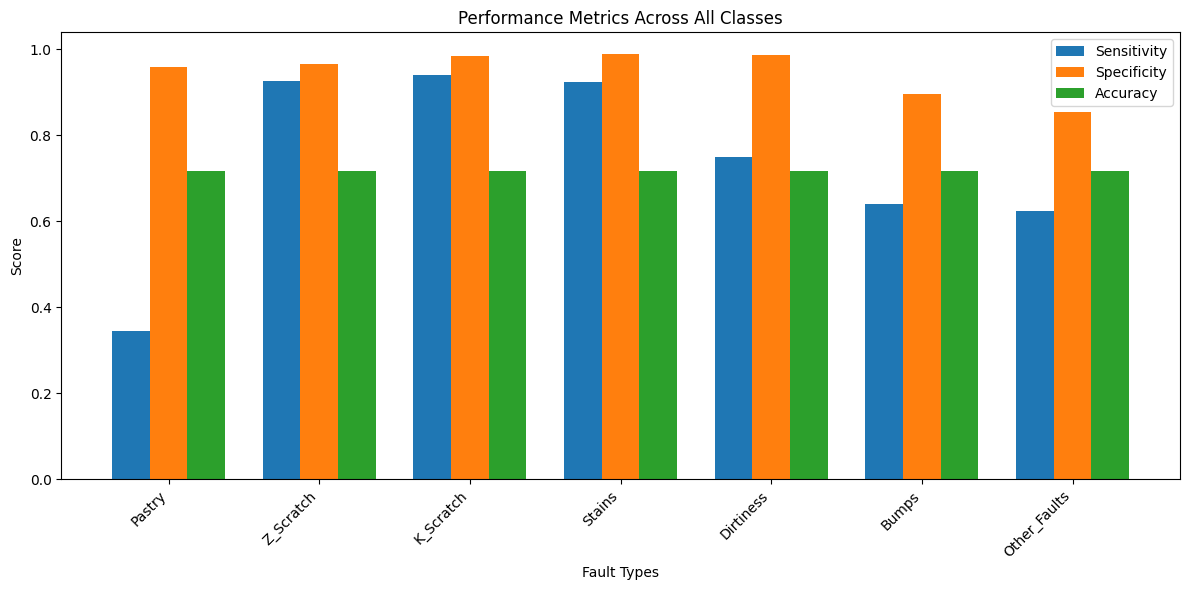

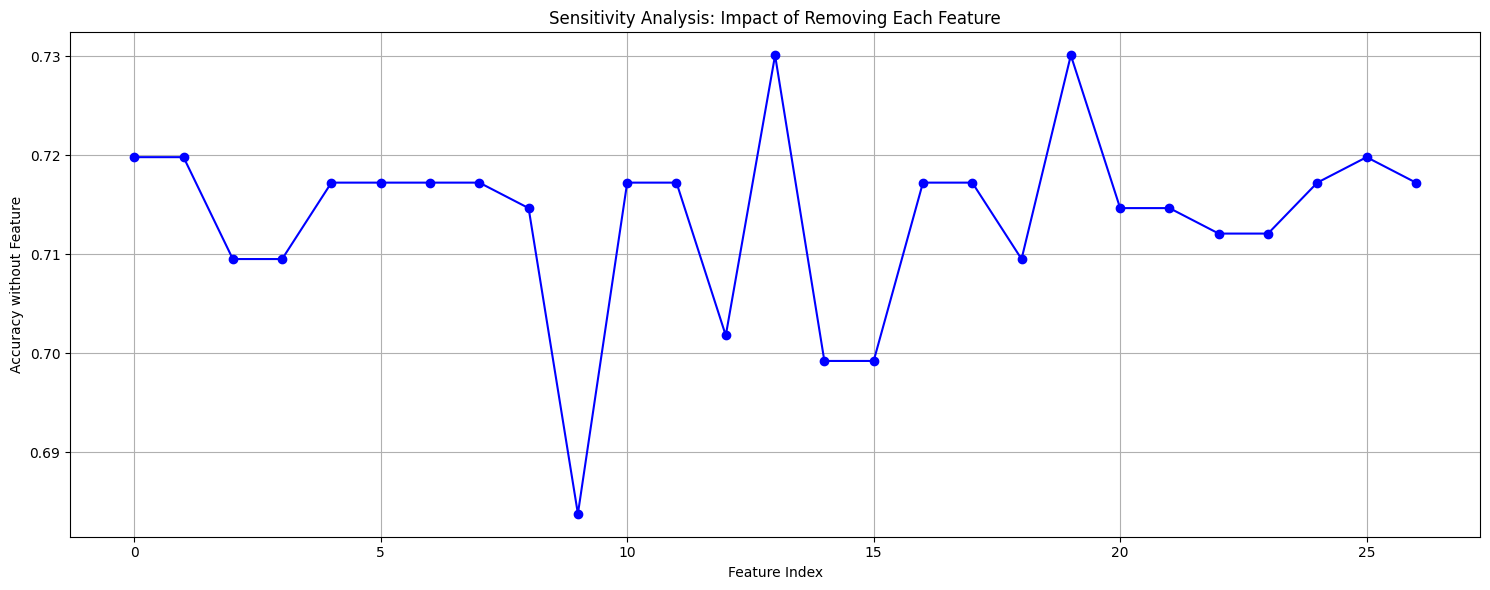

<Figure size 1200x600 with 0 Axes>

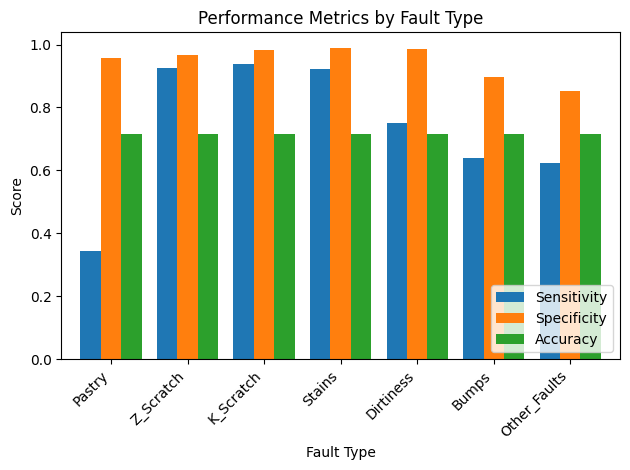

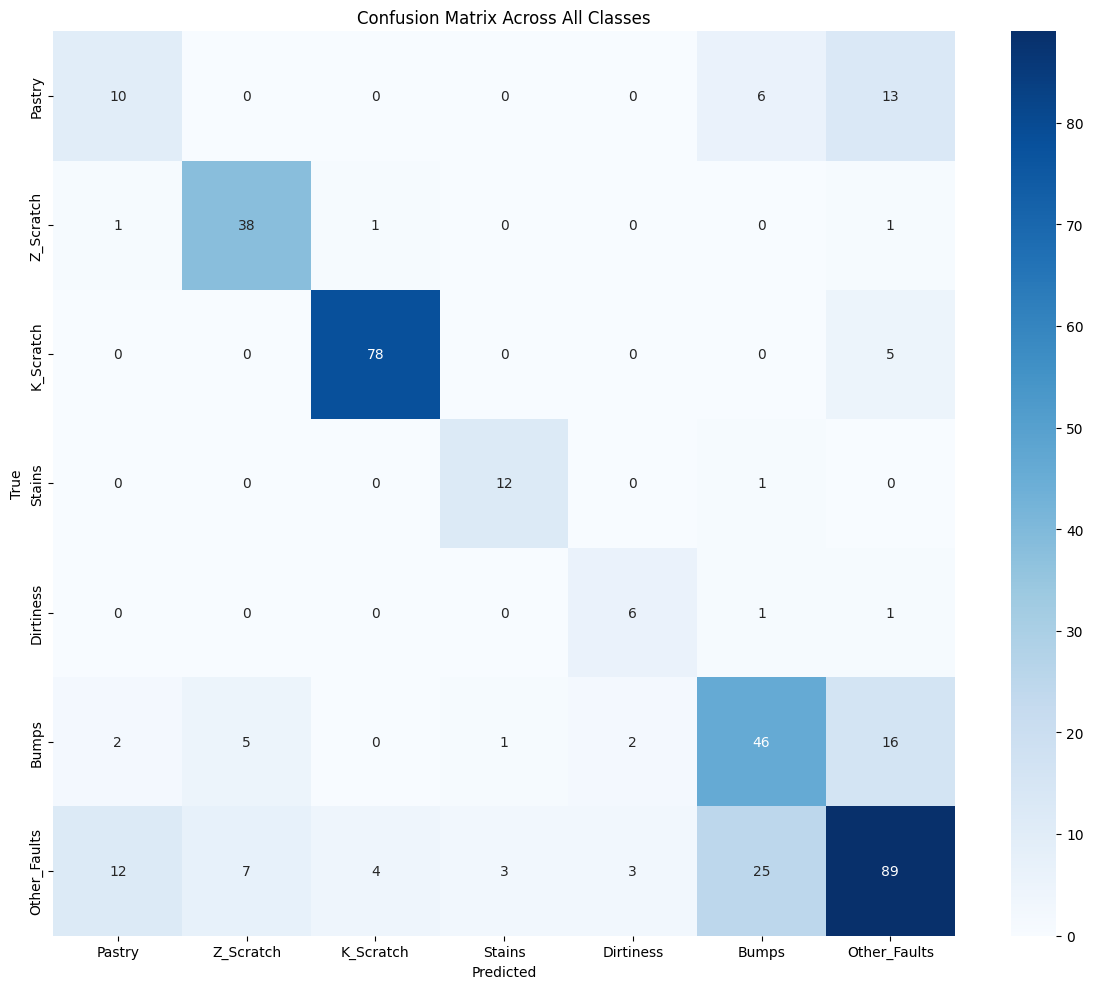

In [29]:
#weighted knn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'normalized_data.csv'
data = pd.read_csv(file_path)

# Identify class columns and feature columns
class_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
X = data.drop(columns=class_columns).values
y = data[class_columns].idxmax(axis=1).values

def plot_overall_metrics(sensitivity_dict, specificity_dict, accuracy):
    """Plot overall metrics across all classes."""
    plt.figure(figsize=(12, 6))
    
    # Prepare data
    classes = list(sensitivity_dict.keys())
    sensitivities = [sensitivity_dict[c] for c in classes]
    specificities = [specificity_dict[c] for c in classes]
    accuracies = [accuracy] * len(classes)
    
    # Create grouped bar chart
    x = np.arange(len(classes))
    width = 0.25
    
    plt.bar(x - width, sensitivities, width, label='Sensitivity')
    plt.bar(x, specificities, width, label='Specificity')
    plt.bar(x + width, accuracies, width, label='Accuracy')
    
    plt.xlabel('Fault Types')
    plt.ylabel('Score')
    plt.title('Performance Metrics Across All Classes')
    plt.xticks(x, classes, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_sensitivity_analysis(sensitivity_results):
    """Plot sensitivity analysis results."""
    plt.figure(figsize=(15, 6))
    
    feature_indices = [r['Feature Index'] for r in sensitivity_results]
    accuracies = [r['Accuracy'] for r in sensitivity_results]
    
    plt.plot(feature_indices, accuracies, 'bo-')
    plt.xlabel('Feature Index')
    plt.ylabel('Accuracy without Feature')
    plt.title('Sensitivity Analysis: Impact of Removing Each Feature')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_fault_performance(sensitivity_dict, specificity_dict, accuracy):
    """Plot performance metrics per fault type."""
    metrics_df = pd.DataFrame({
        'Fault Type': list(sensitivity_dict.keys()),
        'Sensitivity': list(sensitivity_dict.values()),
        'Specificity': list(specificity_dict.values()),
        'Accuracy': [accuracy] * len(sensitivity_dict)
    })
    
    plt.figure(figsize=(12, 6))
    metrics_df.set_index('Fault Type').plot(kind='bar', width=0.8)
    plt.title('Performance Metrics by Fault Type')
    plt.xlabel('Fault Type')
    plt.ylabel('Score')
    plt.legend(loc='lower right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(conf_matrix, class_labels):
    """Plot comprehensive confusion matrix."""
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title('Confusion Matrix Across All Classes')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find optimal k
optimal_k = 1
highest_accuracy = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    
    if mean_accuracy > highest_accuracy:
        highest_accuracy = mean_accuracy
        optimal_k = k

print(f"Optimal k: {optimal_k} with cross-validated accuracy: {highest_accuracy:.2f}")

# Train model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_columns)
accuracy = accuracy_score(y_test, y_pred)

# Calculate sensitivity and specificity
sensitivity = {}
specificity = {}
for i, class_label in enumerate(class_columns):
    TP = conf_matrix[i, i]
    FN = sum(conf_matrix[i, :]) - TP
    FP = sum(conf_matrix[:, i]) - TP
    TN = conf_matrix.sum() - (TP + FN + FP)
    
    sensitivity[class_label] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity[class_label] = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print metrics
print("\nOverall Accuracy:", accuracy)
print("\nSensitivity and Specificity per Class:")
print(f"{'Class':<15}{'Sensitivity':<15}{'Specificity':<15}")
for class_label in class_columns:
    print(f"{class_label:<15}{sensitivity[class_label]:<15.2f}{specificity[class_label]:<15.2f}")

# Perform sensitivity analysis
sensitivity_results = []
for feature_index in range(X.shape[1]):
    X_train_modified = np.delete(X_train, feature_index, axis=1)
    X_test_modified = np.delete(X_test, feature_index, axis=1)
    
    knn.fit(X_train_modified, y_train)
    y_pred_modified = knn.predict(X_test_modified)
    modified_accuracy = accuracy_score(y_test, y_pred_modified)
    
    sensitivity_results.append({
        'Feature Index': feature_index,
        'Accuracy': modified_accuracy
    })

# Create visualizations
plot_overall_metrics(sensitivity, specificity, accuracy)
plot_sensitivity_analysis(sensitivity_results)
plot_fault_performance(sensitivity, specificity, accuracy)
plot_confusion_matrix(conf_matrix, class_columns)

2024-12-28 17:32:56,977 - INFO - Dataset loaded successfully with shape: (1941, 34)
2024-12-28 17:32:57,814 - INFO - Model training completed after 65 iterations
C:\Users\desti\AppData\Local\Temp\ipykernel_16944\3653178754.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], metrics_df['Sensitivity'][i], f'{metrics_df["Sensitivity"][i]:.2%}', ha='center', va='bottom')
C:\Users\desti\AppData\Local\Temp\ipykernel_16944\3653178754.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], metrics_df['Specificity'][i], f'{metrics_df["Specificity"][i]:.2%}', ha='center', va='bottom')
C:\Users\d


Metrics for each class:
              Sensitivity  Specificity  Accuracy
Class                                           
Pastry             0.4688       0.9720    0.9306
Z_Scratch          0.8182       0.9775    0.9640
K_Scratch          0.9437       0.9874    0.9794
Stains             1.0000       0.9946    0.9949
Dirtiness          0.7778       0.9895    0.9846
Bumps              0.6711       0.9137    0.8663
Other_Faults       0.5197       0.9198    0.7635

Overall metrics:
Overall Sensitivity: 0.7427
Overall Specificity: 0.9649
Overall Accuracy: 0.6427


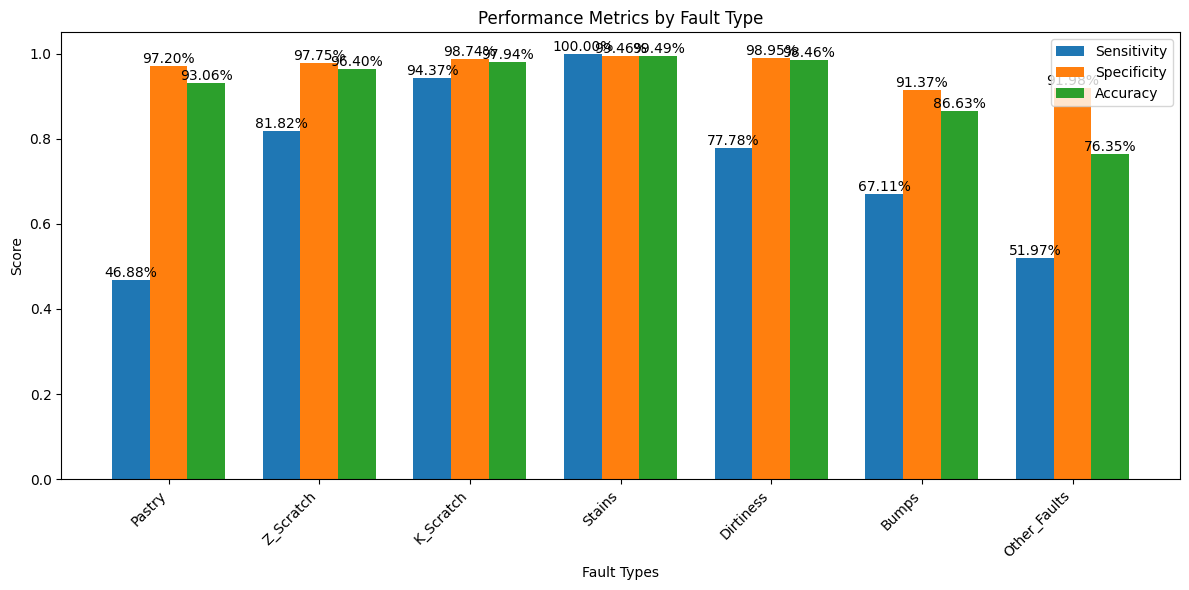

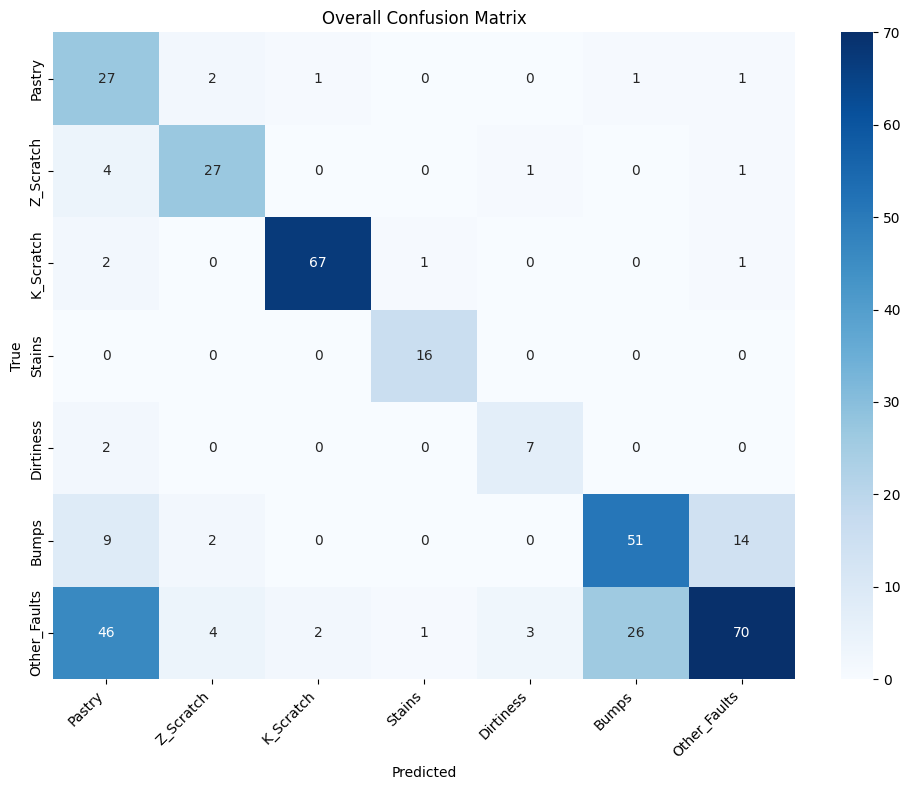

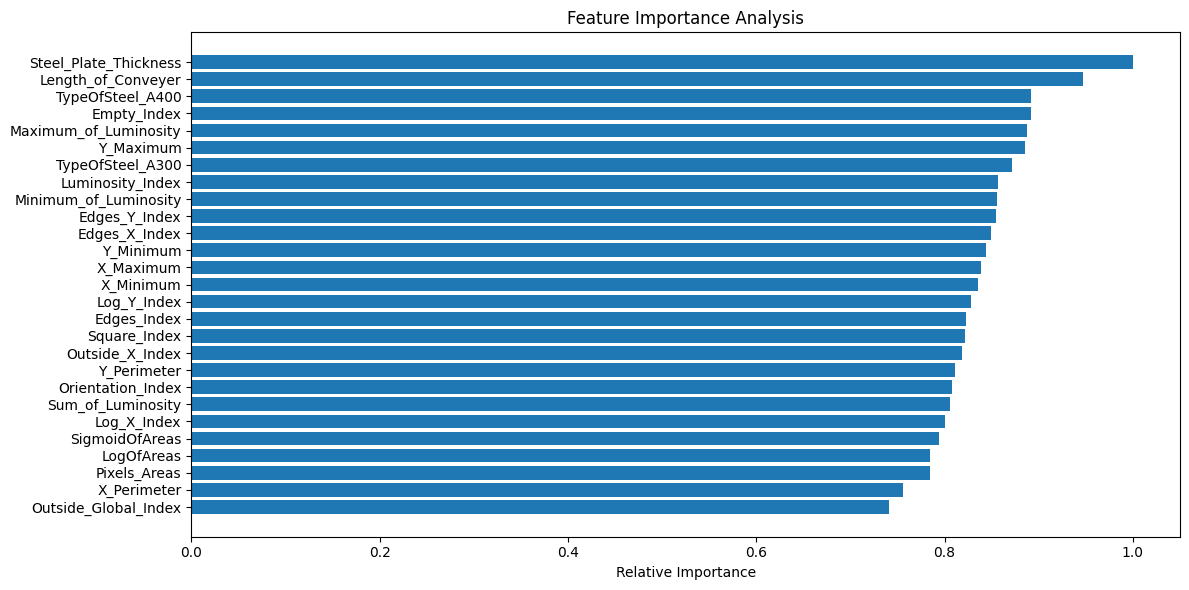

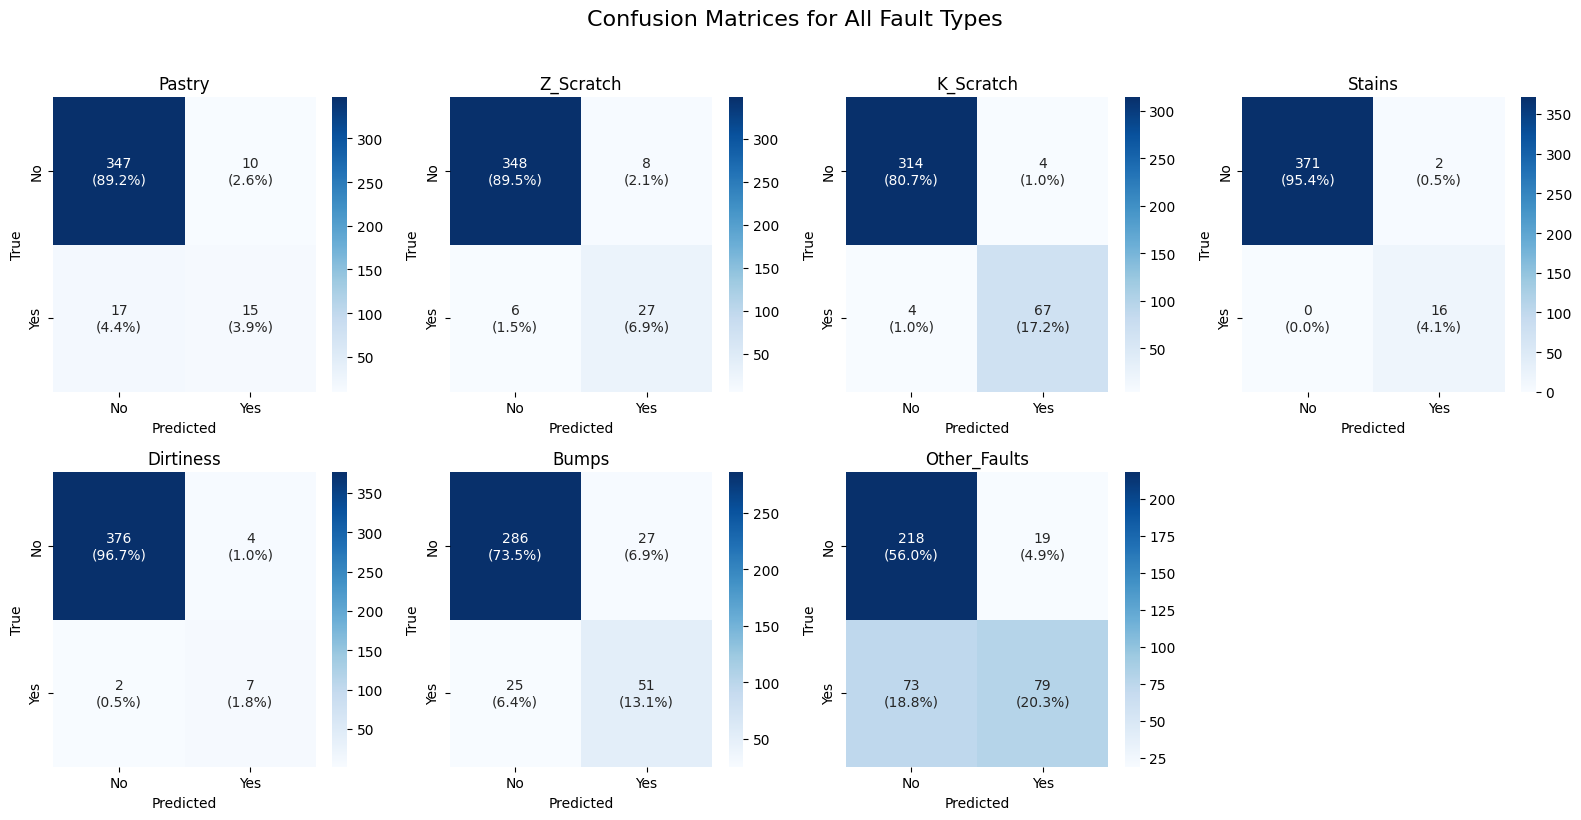

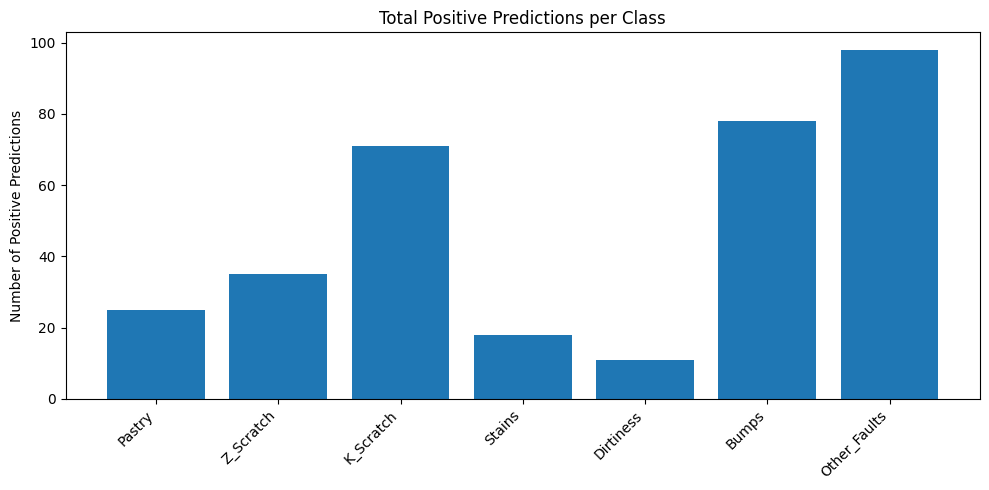

In [33]:
#MLP classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def plot_overall_confusion_matrix(y_test, y_pred, class_names):
    """Plot single confusion matrix for all classes."""
    # Convert one-hot encoded predictions to class labels
    y_test_class = np.argmax(y_test.values, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_class, y_pred_class)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Overall Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names):
    """Plot feature importance based on model weights."""
    # Calculate feature importance from neural network weights
    importance = np.zeros(len(feature_names))
    for layer in model.coefs_:
        importance += np.sum(np.abs(layer), axis=1)[:len(feature_names)]
    
    # Normalize importance scores
    importance = importance / np.max(importance)
    
    # Create DataFrame for plotting
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=True)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(importance_df)), importance_df['Importance'])
    plt.yticks(range(len(importance_df)), importance_df['Feature'])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance Analysis')
    plt.tight_layout()
    plt.show()

def load_and_preprocess_data(file_path):
    """Load and preprocess the dataset."""
    try:
        if not Path(file_path).exists():
            raise FileNotFoundError(f"Dataset not found at {file_path}")
            
        data = pd.read_csv(file_path)
        logger.info(f"Dataset loaded successfully with shape: {data.shape}")
        
        X = data.iloc[:, :-7]
        y = data.iloc[:, -7:]
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        
        return X_scaled, y
        
    except Exception as e:
        logger.error(f"Error in data loading/preprocessing: {str(e)}")
        raise

def train_model(X_train, y_train):
    """Train the neural network model."""
    try:
        mlp = MLPClassifier(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            alpha=0.0001,
            batch_size='auto',
            learning_rate='adaptive',
            max_iter=1000,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10,
            random_state=42
        )
        
        mlp.fit(X_train, y_train)
        logger.info(f"Model training completed after {mlp.n_iter_} iterations")
        
        return mlp
        
    except Exception as e:
        logger.error(f"Error in model training: {str(e)}")
        raise

def calculate_metrics(y_true, y_pred):
    """Calculate sensitivity, specificity, and accuracy."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return sensitivity, specificity, accuracy

def plot_metrics(metrics_df):
    """Plot sensitivity, specificity, and accuracy for each class."""
    plt.figure(figsize=(12, 6))
    
    barWidth = 0.25
    r1 = np.arange(len(metrics_df))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    plt.bar(r1, metrics_df['Sensitivity'], width=barWidth, label='Sensitivity')
    plt.bar(r2, metrics_df['Specificity'], width=barWidth, label='Specificity')
    plt.bar(r3, metrics_df['Accuracy'], width=barWidth, label='Accuracy')
    
    plt.xlabel('Fault Types')
    plt.ylabel('Score')
    plt.title('Performance Metrics by Fault Type')
    plt.xticks([r + barWidth for r in range(len(metrics_df))], metrics_df.index, rotation=45, ha='right')
    plt.legend()
    
    for i in range(len(r1)):
        plt.text(r1[i], metrics_df['Sensitivity'][i], f'{metrics_df["Sensitivity"][i]:.2%}', ha='center', va='bottom')
        plt.text(r2[i], metrics_df['Specificity'][i], f'{metrics_df["Specificity"][i]:.2%}', ha='center', va='bottom')
        plt.text(r3[i], metrics_df['Accuracy'][i], f'{metrics_df["Accuracy"][i]:.2%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plot_all_confusion_matrices(y_test, y_pred, class_names):
    """Plot confusion matrices for all classes in a grid."""
    n_classes = len(class_names)
    n_rows = (n_classes + 3) // 4  # Calculate number of rows needed (ceiling division)
    n_cols = min(4, n_classes)  # Maximum 4 columns
    
    fig = plt.figure(figsize=(16, 4*n_rows))
    plt.suptitle('Confusion Matrices for All Fault Types', fontsize=16, y=1.02)
    
    for idx, class_name in enumerate(class_names):
        plt.subplot(n_rows, n_cols, idx + 1)
        cm = confusion_matrix(y_test[class_name], y_pred[:, idx])
        
        # Calculate percentages for annotations
        cm_percentages = cm / cm.sum() * 100
        
        # Create annotations with both count and percentage
        annotations = np.array([
            [f'{count}\n({percentage:.1f}%)' 
             for count, percentage in zip(row, row_percentages)]
            for row, row_percentages in zip(cm, cm_percentages)
        ])
        
        sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
                   xticklabels=['No', 'Yes'],
                   yticklabels=['No', 'Yes'])
        plt.title(f'{class_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
    
    plt.tight_layout()
    plt.show()
    
    # Additional summary plot of total predictions per class
    plt.figure(figsize=(10, 5))
    class_predictions = [y_pred[:, i].sum() for i in range(len(class_names))]
    plt.bar(class_names, class_predictions)
    plt.title('Total Positive Predictions per Class')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Positive Predictions')
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test, class_names):
    """Evaluate the model and visualize results."""
    try:
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics for each class
        metrics_data = []
        for i, col in enumerate(class_names):
            sensitivity, specificity, accuracy = calculate_metrics(y_test[col], y_pred[:, i])
            metrics_data.append({
                'Class': col,
                'Sensitivity': sensitivity,
                'Specificity': specificity,
                'Accuracy': accuracy
            })
        
        # Create metrics DataFrame
        metrics_df = pd.DataFrame(metrics_data)
        metrics_df.set_index('Class', inplace=True)
        
        # Calculate overall metrics
        overall_sensitivity = np.mean(metrics_df['Sensitivity'])
        overall_specificity = np.mean(metrics_df['Specificity'])
        overall_accuracy = accuracy_score(y_test, y_pred)
        
        # Print metrics
        print("\nMetrics for each class:")
        print(metrics_df.round(4))
        print("\nOverall metrics:")
        print(f"Overall Sensitivity: {overall_sensitivity:.4f}")
        print(f"Overall Specificity: {overall_specificity:.4f}")
        print(f"Overall Accuracy: {overall_accuracy:.4f}")
        
        # Plot metrics
        plot_metrics(metrics_df)

         # Add new plots
        plot_overall_confusion_matrix(y_test, y_pred, class_names)
        plot_feature_importance(model, X_test.columns)
        
        # Plot all confusion matrices
        plot_all_confusion_matrices(y_test, y_pred, class_names)
        
        return overall_accuracy, y_pred, metrics_df
        
    except Exception as e:
        logger.error(f"Error in model evaluation: {str(e)}")
        raise

def main():
    """Main function to run the classification pipeline."""
    try:
        X, y = load_and_preprocess_data('steel_plates_faults.csv')
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y.iloc[:, 0]
        )
        
        model = train_model(X_train, y_train)
        
        accuracy, predictions, metrics = evaluate_model(model, X_test, y_test, y.columns)
        
        return model, accuracy, predictions, metrics
        
    except Exception as e:
        logger.error(f"Error in main pipeline: {str(e)}")
        raise

if __name__ == "__main__":
    main()

In [5]:
#CLUSTERED WEIGHTED 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def calculate_weighted_clustered_knn_metrics(data_path: str):
    """
    Calculate performance metrics for weighted KNN on clustered data.
    
    Args:
        data_path: Path to the kmeans clustered CSV file
    """
    # Define class columns
    class_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", 
                    "Dirtiness", "Bumps", "Other_Faults"]
    
    # Load data
    print(f"Loading clustered data from {data_path}")
    data = pd.read_csv(data_path)
    
    # Prepare features and labels
    y = data[class_columns].idxmax(axis=1).values
    feature_cols = [col for col in data.columns if col not in class_columns]
    X = data[feature_cols].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model with distance-based weights
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculate overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=class_columns)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = {}
    specificity = {}
    
    for i, class_label in enumerate(class_columns):
        TP = conf_matrix[i, i]
        FN = sum(conf_matrix[i, :]) - TP
        FP = sum(conf_matrix[:, i]) - TP
        TN = conf_matrix.sum() - (TP + FN + FP)
        
        sensitivity[class_label] = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity[class_label] = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # Calculate macro-averaged metrics
    macro_sensitivity = np.mean(list(sensitivity.values()))
    macro_specificity = np.mean(list(specificity.values()))
    
    # Print results with clear headers
    print("\n" + "="*50)
    print("WEIGHTED KNN PERFORMANCE METRICS ON CLUSTERED DATA")
    print("="*50)
    
    print("\nOverall Performance Metrics:")
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Macro-averaged Sensitivity: {macro_sensitivity:.4f}")
    print(f"Macro-averaged Specificity: {macro_specificity:.4f}")
    
    print("\nPer-Class Metrics:")
    print("="*45)
    print(f"{'Class':<15}{'Sensitivity':<15}{'Specificity':<15}")
    print("-" * 45)
    for class_label in class_columns:
        print(f"{class_label:<15}{sensitivity[class_label]:<15.4f}{specificity[class_label]:<15.4f}")
    print("="*45)

def main():
    # Run analysis on clustered data
    calculate_weighted_clustered_knn_metrics('kmeans_clusters.csv')

if __name__ == "__main__":
    main()

Loading clustered data from kmeans_clusters.csv

WEIGHTED KNN PERFORMANCE METRICS ON CLUSTERED DATA

Overall Performance Metrics:
Overall Accuracy: 0.9949
Macro-averaged Sensitivity: 0.9772
Macro-averaged Specificity: 0.9991

Per-Class Metrics:
Class          Sensitivity    Specificity    
---------------------------------------------
Pastry         0.9655         1.0000         
Z_Scratch      1.0000         0.9971         
K_Scratch      1.0000         1.0000         
Stains         1.0000         1.0000         
Dirtiness      0.8750         1.0000         
Bumps          1.0000         0.9968         
Other_Faults   1.0000         1.0000         


In [4]:

#cluster non weighted
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def calculate_clustered_knn_metrics(data_path: str):
    """
    Calculate performance metrics for KNN on clustered data.
    
    Args:
        data_path: Path to the kmeans clustered CSV file
    """
    # Define class columns
    class_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", 
                    "Dirtiness", "Bumps", "Other_Faults"]
    
    # Load data
    print(f"Loading clustered data from {data_path}")
    data = pd.read_csv(data_path)
    
    # Prepare features and labels
    y = data[class_columns].idxmax(axis=1).values
    feature_cols = [col for col in data.columns if col not in class_columns]
    X = data[feature_cols].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model with uniform weights
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculate overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=class_columns)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = {}
    specificity = {}
    
    for i, class_label in enumerate(class_columns):
        TP = conf_matrix[i, i]
        FN = sum(conf_matrix[i, :]) - TP
        FP = sum(conf_matrix[:, i]) - TP
        TN = conf_matrix.sum() - (TP + FN + FP)
        
        sensitivity[class_label] = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity[class_label] = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # Calculate macro-averaged metrics
    macro_sensitivity = np.mean(list(sensitivity.values()))
    macro_specificity = np.mean(list(specificity.values()))
    
    # Print results
    print("\nOverall Performance Metrics:")
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Macro-averaged Sensitivity: {macro_sensitivity:.4f}")
    print(f"Macro-averaged Specificity: {macro_specificity:.4f}")
    
    print("\nPer-Class Metrics:")
    print(f"{'Class':<15}{'Sensitivity':<15}{'Specificity':<15}")
    print("-" * 45)
    for class_label in class_columns:
        print(f"{class_label:<15}{sensitivity[class_label]:<15.4f}{specificity[class_label]:<15.4f}")

def main():
    # Run analysis on clustered data
    calculate_clustered_knn_metrics('kmeans_clusters.csv')

if __name__ == "__main__":
    main()

Loading clustered data from kmeans_clusters.csv

Overall Performance Metrics:
Overall Accuracy: 0.9949
Macro-averaged Sensitivity: 0.9772
Macro-averaged Specificity: 0.9991

Per-Class Metrics:
Class          Sensitivity    Specificity    
---------------------------------------------
Pastry         0.9655         1.0000         
Z_Scratch      1.0000         0.9971         
K_Scratch      1.0000         1.0000         
Stains         1.0000         1.0000         
Dirtiness      0.8750         1.0000         
Bumps          1.0000         0.9968         
Other_Faults   1.0000         1.0000         


2024-12-28 14:50:15,334 - INFO - Loading clustered data from kmeans_clusters.csv
2024-12-28 14:50:15,356 - INFO - Dataset loaded successfully with shape: (1941, 36)
2024-12-28 14:50:15,373 - INFO - Preprocessing completed. Features shape: (1941, 29)
2024-12-28 14:50:16,116 - INFO - Model training completed after 66 iterations
C:\Users\desti\AppData\Local\Temp\ipykernel_16944\2601093640.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], metrics_df['Sensitivity'][i],
C:\Users\desti\AppData\Local\Temp\ipykernel_16944\2601093640.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{metrics_df["Sensiti


Metrics for each class:
              Sensitivity  Specificity  Accuracy
Class                                           
Pastry             0.9062       1.0000    0.9923
Z_Scratch          0.9394       0.9944    0.9897
K_Scratch          0.9718       0.9937    0.9897
Stains             1.0000       0.9973    0.9974
Dirtiness          0.8889       0.9974    0.9949
Bumps              0.8026       0.9872    0.9512
Other_Faults       1.0000       0.9747    0.9846

Overall metrics:
Overall Sensitivity: 0.9299
Overall Specificity: 0.9921
Overall Accuracy: 0.9254


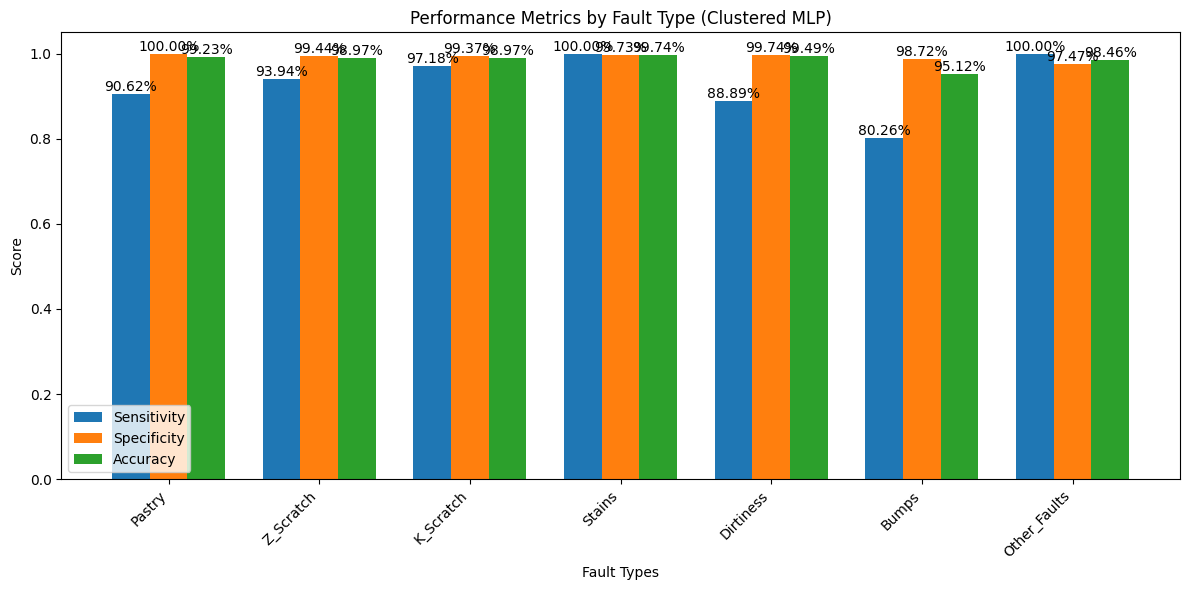

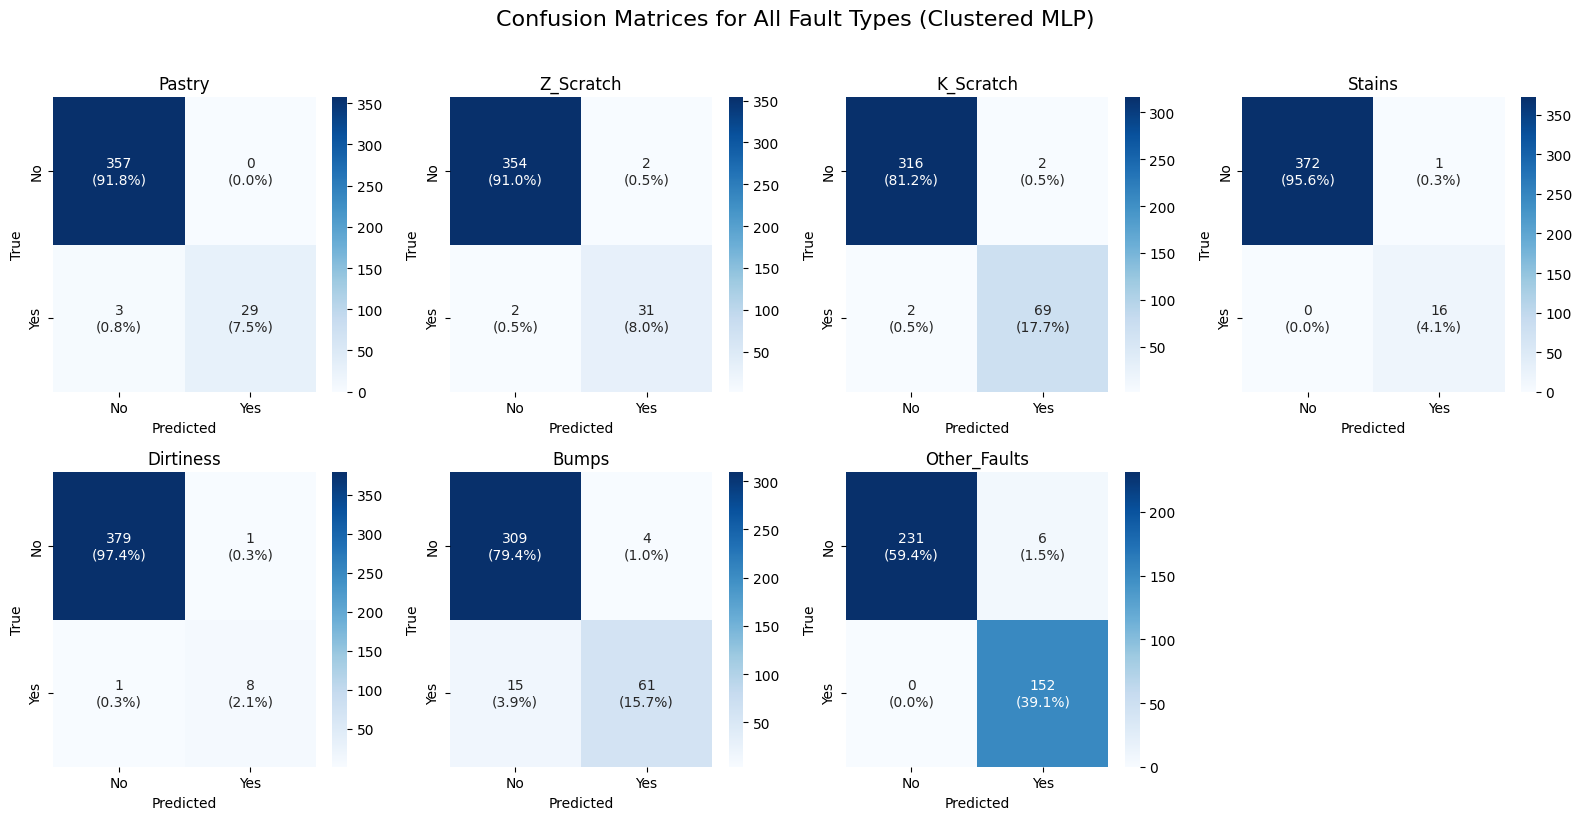

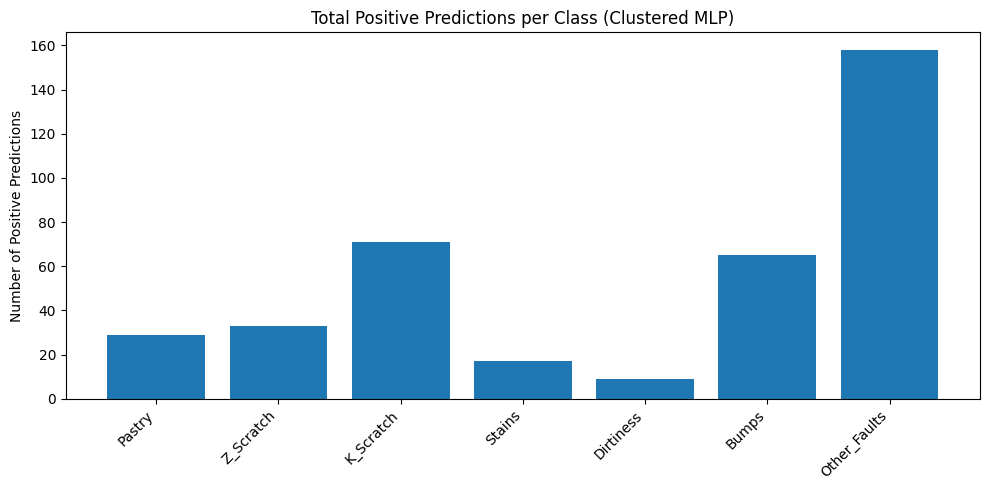

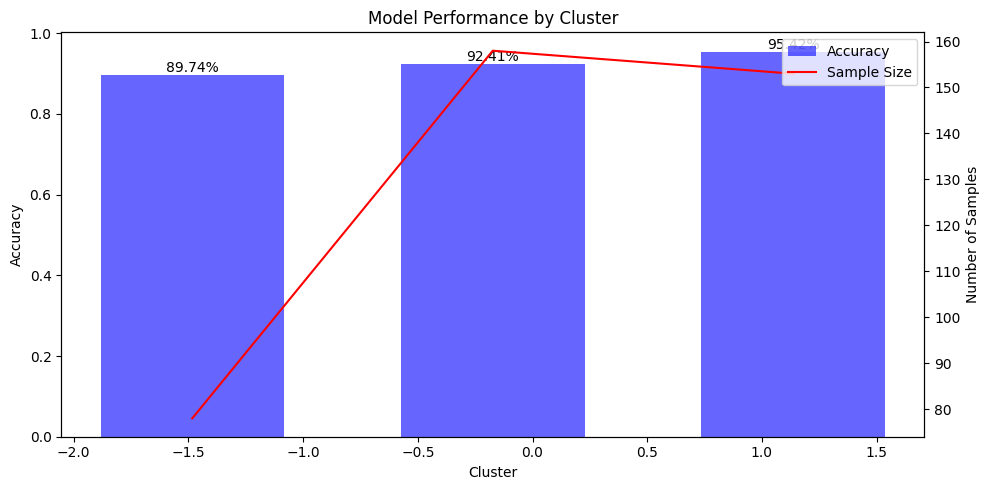

In [26]:
#clustered mlp

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class ClusterMLPClassifier:
    def __init__(self, file_path: str):
        """Initialize with clustered dataset."""
        self.class_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", 
                            "Dirtiness", "Bumps", "Other_Faults"]
        logger.info(f"Loading clustered data from {file_path}")
        self.file_path = file_path
        self.load_and_preprocess_data()

    def load_and_preprocess_data(self):
        """Load and preprocess the clustered dataset."""
        try:
            if not Path(self.file_path).exists():
                raise FileNotFoundError(f"Dataset not found at {self.file_path}")
            
            # Load data
            data = pd.read_csv(self.file_path)
            logger.info(f"Dataset loaded successfully with shape: {data.shape}")
            
            # Separate cluster information and target variables
            self.y = data[self.class_columns]
            
            # Get all feature columns (excluding class columns)
            feature_cols = [col for col in data.columns if col not in self.class_columns]
            X = data[feature_cols]
            
            # Scale features
            self.scaler = StandardScaler()
            self.X = pd.DataFrame(
                self.scaler.fit_transform(X),
                columns=feature_cols
            )
            
            # Store cluster labels for later analysis
            self.cluster_labels = self.X['Cluster_Label'].copy()
            
            logger.info(f"Preprocessing completed. Features shape: {self.X.shape}")
            
        except Exception as e:
            logger.error(f"Error in data loading/preprocessing: {str(e)}")
            raise

    def plot_metrics(self, metrics_df):
        """Plot performance metrics for each class."""
        plt.figure(figsize=(12, 6))
        
        barWidth = 0.25
        r1 = np.arange(len(metrics_df))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]
        
        plt.bar(r1, metrics_df['Sensitivity'], width=barWidth, label='Sensitivity')
        plt.bar(r2, metrics_df['Specificity'], width=barWidth, label='Specificity')
        plt.bar(r3, metrics_df['Accuracy'], width=barWidth, label='Accuracy')
        
        plt.xlabel('Fault Types')
        plt.ylabel('Score')
        plt.title('Performance Metrics by Fault Type (Clustered MLP)')
        plt.xticks([r + barWidth for r in range(len(metrics_df))],
                  metrics_df.index, rotation=45, ha='right')
        plt.legend()
        
        # Add value labels
        for i in range(len(r1)):
            plt.text(r1[i], metrics_df['Sensitivity'][i],
                    f'{metrics_df["Sensitivity"][i]:.2%}',
                    ha='center', va='bottom')
            plt.text(r2[i], metrics_df['Specificity'][i],
                    f'{metrics_df["Specificity"][i]:.2%}',
                    ha='center', va='bottom')
            plt.text(r3[i], metrics_df['Accuracy'][i],
                    f'{metrics_df["Accuracy"][i]:.2%}',
                    ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

    def plot_all_confusion_matrices(self, y_test, y_pred, class_names):
        """Plot confusion matrices for all classes."""
        n_classes = len(class_names)
        n_rows = (n_classes + 3) // 4
        n_cols = min(4, n_classes)
        
        fig = plt.figure(figsize=(16, 4*n_rows))
        plt.suptitle('Confusion Matrices for All Fault Types (Clustered MLP)',
                    fontsize=16, y=1.02)
        
        for idx, class_name in enumerate(class_names):
            plt.subplot(n_rows, n_cols, idx + 1)
            cm = confusion_matrix(y_test[class_name], y_pred[:, idx])
            
            # Calculate percentages
            cm_percentages = cm / cm.sum() * 100
            
            # Create annotations
            annotations = np.array([
                [f'{count}\n({percentage:.1f}%)' 
                 for count, percentage in zip(row, row_percentages)]
                for row, row_percentages in zip(cm, cm_percentages)
            ])
            
            sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
                       xticklabels=['No', 'Yes'],
                       yticklabels=['No', 'Yes'])
            plt.title(f'{class_name}')
            plt.xlabel('Predicted')
            plt.ylabel('True')
        
        plt.tight_layout()
        plt.show()
        
        # Plot total predictions per class
        plt.figure(figsize=(10, 5))
        class_predictions = [y_pred[:, i].sum() for i in range(len(class_names))]
        plt.bar(class_names, class_predictions)
        plt.title('Total Positive Predictions per Class (Clustered MLP)')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Number of Positive Predictions')
        plt.tight_layout()
        plt.show()

    def calculate_metrics(self, y_true, y_pred):
        """Calculate sensitivity, specificity, and accuracy."""
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        return sensitivity, specificity, accuracy

    def plot_cluster_performance(self, y_test, y_pred, cluster_test):
        """Plot performance metrics by cluster."""
        clusters = sorted(cluster_test.unique())
        metrics_by_cluster = []
        
        for cluster in clusters:
            cluster_mask = cluster_test == cluster
            cluster_y_test = y_test[cluster_mask]
            cluster_y_pred = y_pred[cluster_mask]
            
            # Calculate accuracy for this cluster
            accuracy = accuracy_score(cluster_y_test.values.argmax(axis=1),
                                   cluster_y_pred.argmax(axis=1))
            
            metrics_by_cluster.append({
                'Cluster': cluster,
                'Accuracy': accuracy,
                'Samples': sum(cluster_mask)
            })
        
        # Create DataFrame and plot
        cluster_metrics = pd.DataFrame(metrics_by_cluster)
        
        plt.figure(figsize=(10, 5))
        ax1 = plt.gca()
        ax2 = ax1.twinx()
        
        # Plot accuracy bars
        bars = ax1.bar(cluster_metrics['Cluster'], cluster_metrics['Accuracy'],
                      alpha=0.6, color='b', label='Accuracy')
        ax1.set_xlabel('Cluster')
        ax1.set_ylabel('Accuracy')
        
        # Plot sample size line
        line = ax2.plot(cluster_metrics['Cluster'], cluster_metrics['Samples'],
                       'r-', label='Sample Size')
        ax2.set_ylabel('Number of Samples')
        
        # Add labels on bars
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2%}',
                    ha='center', va='bottom')
        
        # Combine legends
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc='upper right')
        
        plt.title('Model Performance by Cluster')
        plt.tight_layout()
        plt.show()

    def train_and_evaluate(self):
        """Train and evaluate the MLP model."""
        try:
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                self.X, self.y, test_size=0.2, random_state=42,
                stratify=self.y.iloc[:, 0]
            )
            
            # Keep track of cluster labels for test set
            cluster_test = X_test['Cluster_Label'].copy()
            
            # Initialize and train model
            mlp = MLPClassifier(
                hidden_layer_sizes=(100, 50),
                activation='relu',
                solver='adam',
                alpha=0.0001,
                batch_size='auto',
                learning_rate='adaptive',
                max_iter=1000,
                early_stopping=True,
                validation_fraction=0.1,
                n_iter_no_change=10,
                random_state=42
            )
            
            mlp.fit(X_train, y_train)
            logger.info(f"Model training completed after {mlp.n_iter_} iterations")
            
            # Make predictions
            y_pred = mlp.predict(X_test)
            
            # Calculate metrics for each class
            metrics_data = []
            for i, col in enumerate(self.class_columns):
                sensitivity, specificity, accuracy = self.calculate_metrics(
                    y_test[col], y_pred[:, i]
                )
                metrics_data.append({
                    'Class': col,
                    'Sensitivity': sensitivity,
                    'Specificity': specificity,
                    'Accuracy': accuracy
                })
            
            # Create metrics DataFrame
            metrics_df = pd.DataFrame(metrics_data)
            metrics_df.set_index('Class', inplace=True)
            
            # Calculate overall metrics
            overall_sensitivity = np.mean(metrics_df['Sensitivity'])
            overall_specificity = np.mean(metrics_df['Specificity'])
            overall_accuracy = accuracy_score(y_test, y_pred)
            
            # Print metrics
            print("\nMetrics for each class:")
            print(metrics_df.round(4))
            print("\nOverall metrics:")
            print(f"Overall Sensitivity: {overall_sensitivity:.4f}")
            print(f"Overall Specificity: {overall_specificity:.4f}")
            print(f"Overall Accuracy: {overall_accuracy:.4f}")
            
            # Generate visualizations
            self.plot_metrics(metrics_df)
            self.plot_all_confusion_matrices(y_test, y_pred, self.class_columns)
            self.plot_cluster_performance(y_test, y_pred, cluster_test)
            
            return mlp, overall_accuracy, y_pred, metrics_df
            
        except Exception as e:
            logger.error(f"Error in model training/evaluation: {str(e)}")
            raise

def main():
    """Main function to run the classification pipeline."""
    try:
        analyzer = ClusterMLPClassifier('kmeans_clusters.csv')
        model, accuracy, predictions, metrics = analyzer.train_and_evaluate()
        return model, accuracy, predictions, metrics
        
    except Exception as e:
        logger.error(f"Error in main pipeline: {str(e)}")
        raise

if __name__ == "__main__":
    main()

In [2]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
file_path = 'normalized_data.csv'
data = pd.read_csv(file_path)

# Identify class columns and feature columns
class_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
X = data.drop(columns=class_columns).values
y = data[class_columns].idxmax(axis=1).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def perform_sensitivity_analysis(model, X_train, X_test, y_train, y_test):
    sensitivity_results = []
    for feature_index in range(X_train.shape[1]):
        X_train_modified = np.delete(X_train, feature_index, axis=1)
        X_test_modified = np.delete(X_test, feature_index, axis=1)
        
        model.fit(X_train_modified, y_train)
        y_pred_modified = model.predict(X_test_modified)
        modified_accuracy = accuracy_score(y_test, y_pred_modified)
        
        sensitivity_results.append({
            'Feature Index': feature_index,
            'Accuracy': modified_accuracy
        })
    return sensitivity_results

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_results = perform_sensitivity_analysis(mlp, X_train, X_test, y_train, y_test)

# Weighted KNN
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_results = perform_sensitivity_analysis(weighted_knn, X_train, X_test, y_train, y_test)

# Non-weighted KNN
non_weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
non_weighted_knn_results = perform_sensitivity_analysis(non_weighted_knn, X_train, X_test, y_train, y_test)

# Prepare data for plotting
feature_indices = [r['Feature Index'] for r in mlp_results]
mlp_accuracies = [r['Accuracy'] for r in mlp_results]
weighted_knn_accuracies = [r['Accuracy'] for r in weighted_knn_results]
non_weighted_knn_accuracies = [r['Accuracy'] for r in non_weighted_knn_results]

# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(feature_indices, mlp_accuracies, 'bo-', label='MLP')
plt.plot(feature_indices, weighted_knn_accuracies, 'ro-', label='Weighted KNN')
plt.plot(feature_indices, non_weighted_knn_accuracies, 'go-', label='Non-Weighted KNN')

plt.xlabel('Feature Index')
plt.ylabel('Accuracy without Feature')
plt.title('Sensitivity Analysis: Impact of Removing Each Feature')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('sensitivity_analysis_comparison.png')
plt.close()

print("Sensitivity analysis completed and plot saved as sensitivity_analysis_comparison.png")

Sensitivity analysis completed and plot saved as sensitivity_analysis_comparison.png


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
file_path = 'normalized_data.csv'
data = pd.read_csv(file_path)

# Identify class columns and feature columns
class_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
feature_columns = [col for col in data.columns if col not in class_columns]
X = data.drop(columns=class_columns).values
y = data[class_columns].idxmax(axis=1).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def perform_sensitivity_analysis(model, X_train, X_test, y_train, y_test):
    sensitivity_results = []
    for feature_index in range(X_train.shape[1]):
        X_train_modified = np.delete(X_train, feature_index, axis=1)
        X_test_modified = np.delete(X_test, feature_index, axis=1)
        
        model.fit(X_train_modified, y_train)
        y_pred_modified = model.predict(X_test_modified)
        modified_accuracy = accuracy_score(y_test, y_pred_modified)
        
        sensitivity_results.append({
            'Feature': feature_columns[feature_index],
            'Accuracy': modified_accuracy
        })
    return sensitivity_results

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_results = perform_sensitivity_analysis(mlp, X_train, X_test, y_train, y_test)

# Weighted KNN
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_results = perform_sensitivity_analysis(weighted_knn, X_train, X_test, y_train, y_test)

# Non-weighted KNN
non_weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
non_weighted_knn_results = perform_sensitivity_analysis(non_weighted_knn, X_train, X_test, y_train, y_test)

# Prepare data for plotting
feature_names = [r['Feature'] for r in mlp_results]
mlp_accuracies = [r['Accuracy'] for r in mlp_results]
weighted_knn_accuracies = [r['Accuracy'] for r in weighted_knn_results]
non_weighted_knn_accuracies = [r['Accuracy'] for r in non_weighted_knn_results]

# Create the plot
plt.figure(figsize=(20, 10))

# Create x-axis positions
x = np.arange(len(feature_names))

# Plot lines
plt.plot(x, mlp_accuracies, 'bo-', label='MLP', linewidth=2, markersize=8)
plt.plot(x, weighted_knn_accuracies, 'ro-', label='Weighted KNN', linewidth=2, markersize=8)
plt.plot(x, non_weighted_knn_accuracies, 'go-', label='Non-Weighted KNN', linewidth=2, markersize=8)

# Customize x-axis
plt.xticks(x, feature_names, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Features', fontsize=12, labelpad=10)
plt.ylabel('Accuracy without Feature', fontsize=12)
plt.title('Sensitivity Analysis: Impact of Removing Each Feature', fontsize=14, pad=20)

# Enhance grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=10, loc='lower right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Save the plot
plt.savefig('sensitivity_analysis_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

# Print feature importance ranking
print("\nFeature Importance Ranking (based on accuracy impact when removed):")
print("\nMLP Feature Importance:")
mlp_importance = sorted(mlp_results, key=lambda x: x['Accuracy'])
for i, result in enumerate(mlp_importance, 1):
    print(f"{i}. {result['Feature']}: {result['Accuracy']:.4f}")

print("\nWeighted KNN Feature Importance:")
weighted_importance = sorted(weighted_knn_results, key=lambda x: x['Accuracy'])
for i, result in enumerate(weighted_importance, 1):
    print(f"{i}. {result['Feature']}: {result['Accuracy']:.4f}")

print("\nNon-Weighted KNN Feature Importance:")
non_weighted_importance = sorted(non_weighted_knn_results, key=lambda x: x['Accuracy'])
for i, result in enumerate(non_weighted_importance, 1):
    print(f"{i}. {result['Feature']}: {result['Accuracy']:.4f}")

print("\nSensitivity analysis completed and plot saved as sensitivity_analysis_comparison.png")


Feature Importance Ranking (based on accuracy impact when removed):

MLP Feature Importance:
1. Sum_of_Luminosity: 0.7326
2. X_Minimum: 0.7352
3. Pixels_Areas: 0.7404
4. Length_of_Conveyer: 0.7429
5. Log_X_Index: 0.7429
6. Log_Y_Index: 0.7429
7. Y_Minimum: 0.7481
8. Edges_X_Index: 0.7481
9. Edges_Y_Index: 0.7506
10. X_Perimeter: 0.7532
11. Empty_Index: 0.7532
12. Square_Index: 0.7532
13. LogOfAreas: 0.7532
14. Orientation_Index: 0.7532
15. Minimum_of_Luminosity: 0.7532
16. Steel_Plate_Thickness: 0.7558
17. SigmoidOfAreas: 0.7584
18. Y_Maximum: 0.7609
19. Maximum_of_Luminosity: 0.7635
20. Edges_Index: 0.7635
21. Y_Perimeter: 0.7661
22. TypeOfSteel_A300: 0.7661
23. TypeOfSteel_A400: 0.7661
24. Outside_X_Index: 0.7661
25. Outside_Global_Index: 0.7686
26. X_Maximum: 0.7763
27. Luminosity_Index: 0.7763

Weighted KNN Feature Importance:
1. Length_of_Conveyer: 0.6838
2. Empty_Index: 0.6992
3. Square_Index: 0.6992
4. Steel_Plate_Thickness: 0.7018
5. Y_Minimum: 0.7095
6. Y_Maximum: 0.7095
7. E